In [11]:
import pandas as pd
df=pd.read_csv("udemy_courses.csv",parse_dates=["published_timestamp"])
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3678 non-null   int64              
 1   course_title         3678 non-null   object             
 2   url                  3678 non-null   object             
 3   is_paid              3678 non-null   bool               
 4   price                3678 non-null   int64              
 5   num_subscribers      3678 non-null   int64              
 6   num_reviews          3678 non-null   int64              
 7   num_lectures         3678 non-null   int64              
 8   level                3678 non-null   object             
 9   content_duration     3678 non-null   float64            
 10  published_timestamp  3678 non-null   datetime64[ns, UTC]
 11  subject              3678 non-null   object             
dtypes: bool(1), datetime

In [13]:
# Find Shape of our dataset

In [15]:
df.shape

(3678, 12)

<Axes: >

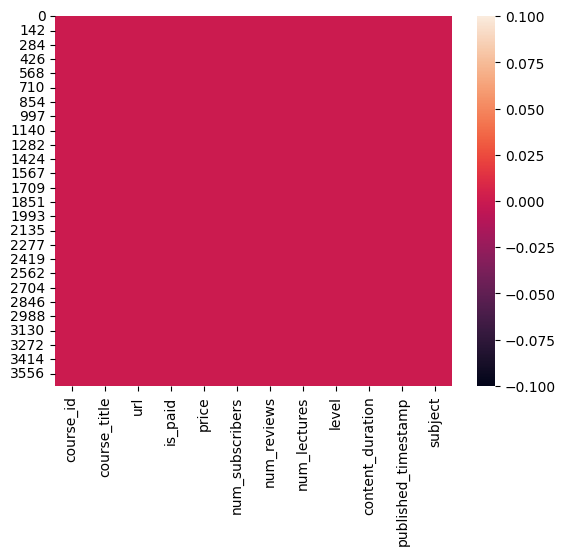

In [33]:
# check null value in the dataset with heatmap graph
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull())

In [23]:
# check for duplicate data and drop them
dup=df.duplicated().any()
print("Are there any duplicated value in data?",dup)

Are there any duplicated value in data? True


In [25]:
df=df.drop_duplicates()
dup=df.duplicated().any()
print("Are there any duplicated value in data?",dup)

Are there any duplicated value in data? False


In [29]:
# Find our the Number of courses per subject

In [30]:
df["subject"].value_counts()

subject
Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: count, dtype: int64

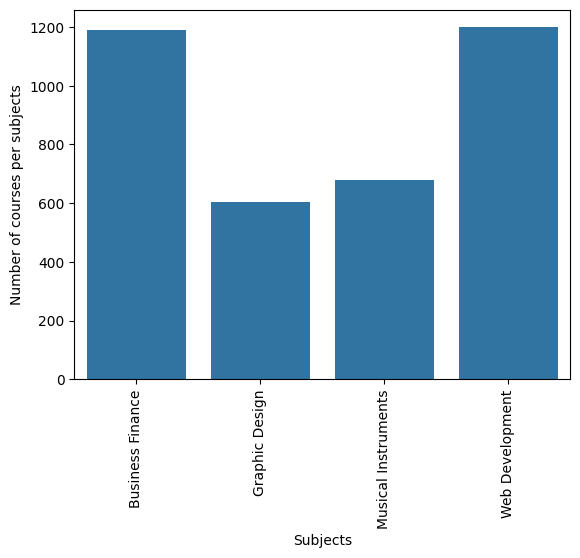

In [56]:
sns.countplot(x="subject",data=df)
plt.xticks(rotation=90)
plt.xlabel("Subjects",fontsize=10)
plt.ylabel("Number of courses per subjects",fontsize=10)
plt.show()

In [57]:
# For which levels udemy provided the courses

level
All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64
**************************************************


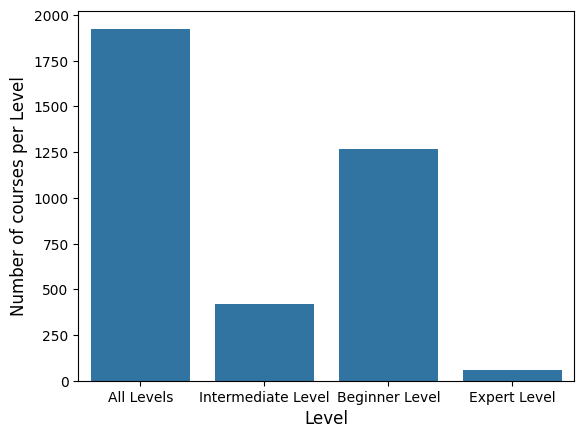

In [75]:
level=df["level"].value_counts()
print(level)
print("*"*50)
sns.countplot(x="level",data=df)
plt.xlabel("Level",fontsize=12)
plt.ylabel("Number of courses per Level",fontsize=12)
plt.show()

In [76]:
# display the count of paid and free courses

is_paid
True     3362
False     310
Name: count, dtype: int64


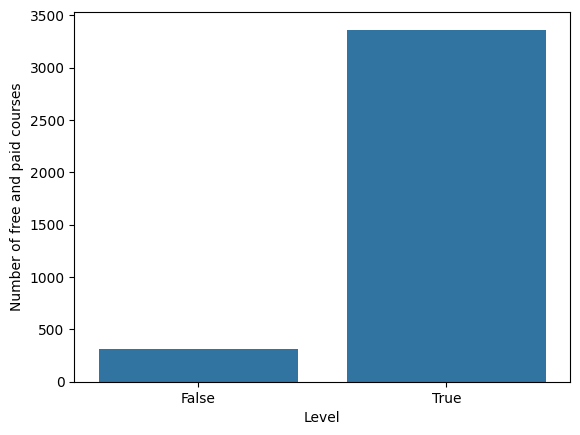

In [85]:
print(df["is_paid"].value_counts())
sns.countplot(x="is_paid",data=df)
plt.xlabel("Level",fontsize=10)
plt.ylabel("Number of free and paid courses",fontsize=10)
plt.show()

In [86]:
# which course has more lectures (Free or paid)?

In [91]:
a=df.groupby("is_paid").agg({"num_lectures":"mean"})
a

,num_lectures
is_paid,
False,21.416129
True,41.866746


In [92]:
# which courses have a higher number of subscribers free or paid

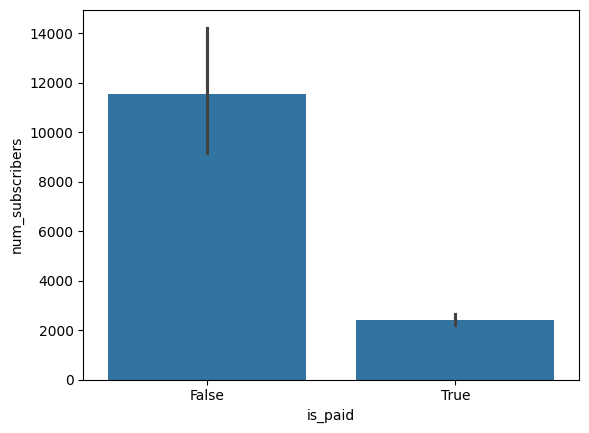

In [111]:
b=df.groupby("is_paid").agg({"num_subscribers":"sum"})
b=b.sort_values(by="num_subscribers",ascending=False)
sns.barplot(x="is_paid",y="num_subscribers",data=df)
plt.show()

                    num_subscribers
level                              
All Levels                  6871791
Beginner Level              4051843
Expert Level                  50196
Intermediate Level           742005



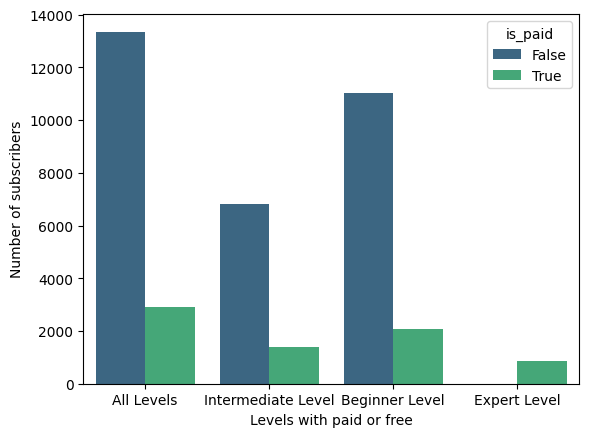

In [136]:
# which level has the highest number of subscribers?
c=df.groupby("level").agg({"num_subscribers":"sum"})
print(c)
print()
sns.barplot(x="level",y="num_subscribers",data=df,errorbar=("ci",0),palette="viridis",hue="is_paid")
plt.xlabel("Levels with paid or free")
plt.ylabel("Number of subscribers")
plt.show()

In [154]:
# Find most popular course title in terms of number of subscribers
df[df["num_subscribers"].max()==df["num_subscribers"]]["course_title"]

2827    Learn HTML5 Programming From Scratch
Name: course_title, dtype: object

<Axes: xlabel='num_subscribers', ylabel='course_title'>

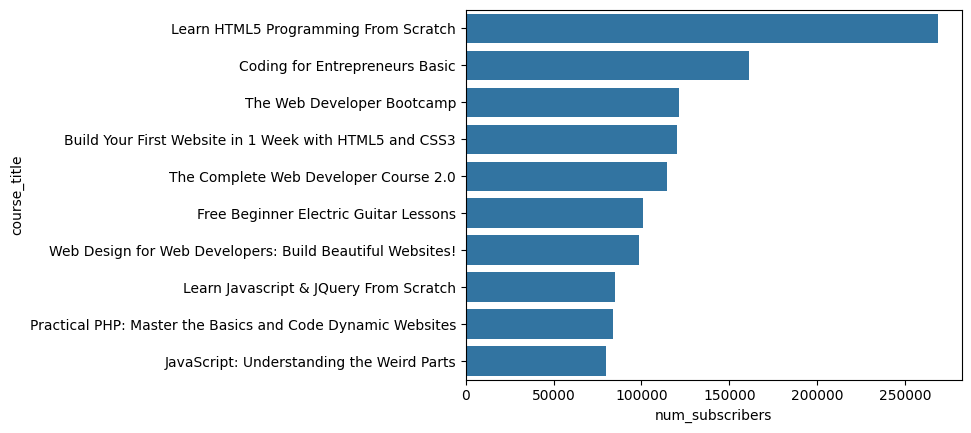

In [184]:
# display 10 most popular courses as per number of subscribers
top_10=df.sort_values(by="num_subscribers",ascending=False).head(10)
sns.barplot(x="num_subscribers",y="course_title",data=top_10)

In [185]:
# Find out the course which having the highest number of reviews

<Axes: xlabel='subject', ylabel='num_reviews'>

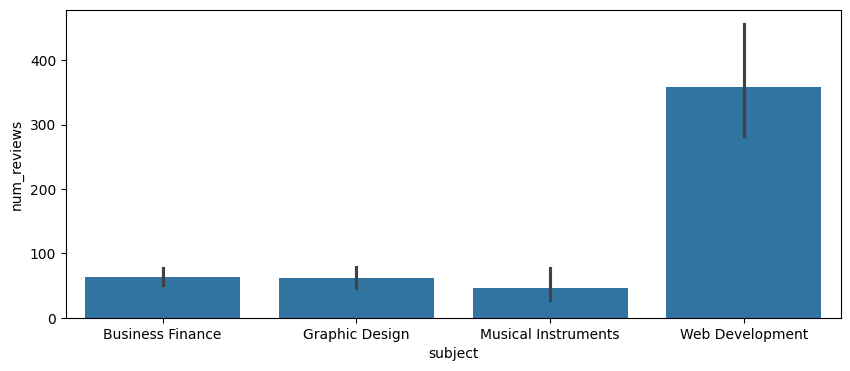

In [196]:
plt.figure(figsize=(10,4))
sns.barplot(x="subject",y="num_reviews",data=df)

In [200]:
# Does price Affect number of reviews

<Axes: xlabel='price', ylabel='num_reviews'>

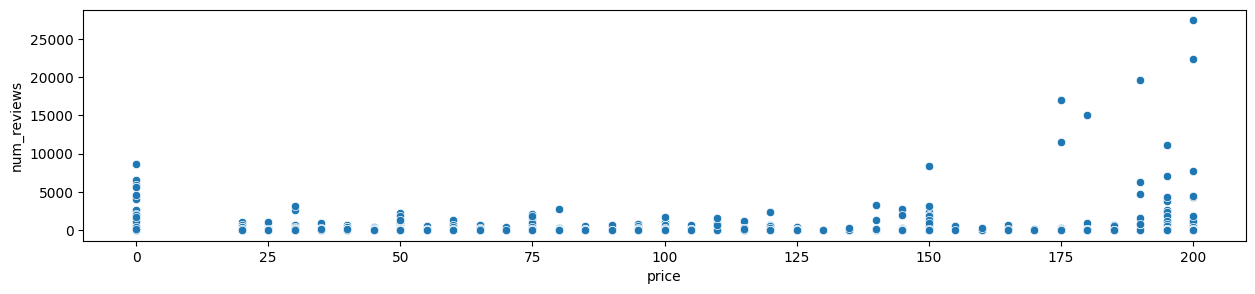

In [199]:
plt.figure(figsize=(15,3))
sns.scatterplot(x="price",y="num_reviews",data=df)

In [206]:
# Find total number of courses related to python

In [205]:
len(df[df["course_title"].str.contains("python",case=False)])

29

In [207]:
# Display 10 most popular python courses as per number of subscribers

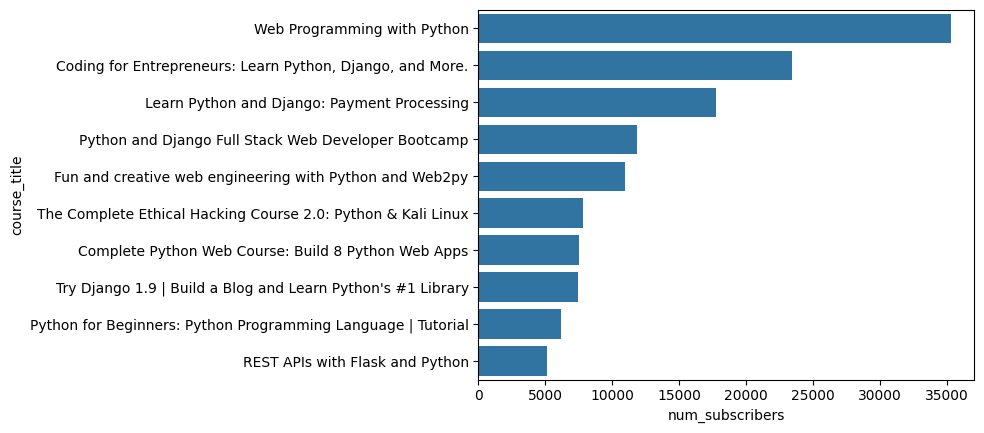

In [216]:
python=df[df["course_title"].str.contains("python",case=False)].sort_values(by="num_subscribers",ascending=False).head(10)
sns.barplot(x="num_subscribers",y="course_title",data=python)
plt.show()

In [217]:
# in which year the highest number of courses were posted?

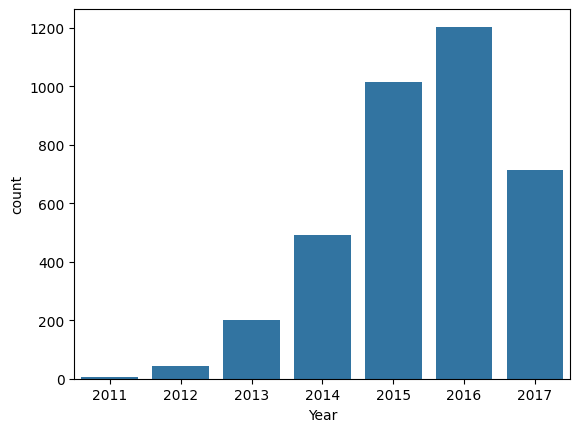

In [222]:
import datetime as dt
df["Year"]=df["published_timestamp"].dt.year
sns.countplot(x="Year",data=df)
plt.show()

In [227]:
# Display category wise count of posted subjects [Year wise]
df.groupby(["Year","subject"]).agg({"subject":"count"})

subject
Year subject                     
2011 Web Development            5
2012 Business Finance           6
     Graphic Design            10
     Musical Instruments       10
     Web Development           19
2013 Business Finance          84
     Graphic Design            23
     Musical Instruments       39
     Web Development           55
2014 Business Finance         192
     Graphic Design            65
     Musical Instruments      120
     Web Development          113
2015 Business Finance         339
     Graphic Design           168
     Musical Instruments      171
     Web Development          336
2016 Business Finance         347
     Graphic Design           181
     Musical Instruments      228
     Web Development          448
2017 Business Finance         223
     Graphic Design           155
     Musical Instruments      112
     Web Development          223